# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Users\hp\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv', nrows=50000)
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [9]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [10]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [13]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:49<00:00, 1009.94it/s]


In [17]:
# after preprocesing
preprocessed_essays[20000]

'kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism eager beavers always strive work hardest working past limitations materials ones seek students teach title school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore ever felt like ants pants needed groove move meeting kids feel time want able move learn say wobble chairs answer love develop core enhances gross motor turn fine motor skills also want learn games kids not want sit worksheets want learn count jumping playing physical engagement key success number toss color shape mats make happen students forget work fun 6 year old deserves nannan'

In [18]:
project_data['essay'] = preprocessed_essays


<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [19]:
# similarly you can preprocess the titles also

In [20]:
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:02<00:00, 21702.23it/s]


In [21]:
project_data['project_title'] = preprocessed_titles

In [22]:
#Preprocessing project_grade_category

#reference link: https://stackoverflow.com/questions/28986489/python-pandas-how-to-replace-a-characters-in-a-column-of-a-dataframe

project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-', '_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ', '_')

## 1.5 Preparing data for models

In [23]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [24]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (50000, 9)


In [25]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (50000, 30)


In [26]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

In [27]:
#school state
#Using CountVectorizer to convert values into one hot encoded
vectorizer = CountVectorizer(lowercase=False , binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())

school_state_one_hot = vectorizer.transform(project_data['school_state'].values)
print('Shape of matrix after one hot encoding', school_state_one_hot.shape)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of matrix after one hot encoding (50000, 51)


In [28]:
#teacher_prefix
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values.astype('U'))
#While running this i got an error:np.nan is an invalid document, expected byte or unicode string.
#I fixed it by using stackoverflow.com
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
print(vectorizer.get_feature_names())


teacher_prefix_one_hot = vectorizer.transform(project_data['teacher_prefix'].values.astype('U')) #here also i did same as above
print('Shape of matrix of one hot encoding', teacher_prefix_one_hot.shape)

['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher', 'nan']
Shape of matrix of one hot encoding (50000, 6)


In [29]:
#project_grade_category  
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'].values.astype('U'))
print(vectorizer.get_feature_names())


project_grade_category_one_hot = vectorizer.fit_transform(project_data['project_grade_category'].values.astype('U'))
print('Shape of matrix of one hot encoding', project_grade_category_one_hot.shape)

['Grades_3_5', 'Grades_6_8', 'Grades_9_12', 'Grades_PreK_2']
Shape of matrix of one hot encoding (50000, 4)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [30]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (50000, 12101)


In [31]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

In [32]:
vectorizer = CountVectorizer(min_df=10)
title_bow = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",title_bow.shape)

Shape of matrix after one hot encodig  (50000, 2039)


#### 1.5.2.2 TFIDF vectorizer

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (50000, 12101)


In [34]:
vectorizer = TfidfVectorizer(min_df=10)
title_tfidf = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",title_tfidf.shape)

Shape of matrix after one hot encodig  (50000, 2039)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [35]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [36]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [37]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:24<00:00, 2069.16it/s]


50000
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [38]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [39]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essays.append(vector)

print(len(tfidf_w2v_vectors_essays))
print(len(tfidf_w2v_vectors_essays[0]))

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:57<00:00, 281.96it/s]


50000
300


In [40]:
# Similarly you can vectorize for title also 

In [41]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles.append(vector)

print(len(tfidf_w2v_vectors_titles))
print(len(tfidf_w2v_vectors_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:02<00:00, 19246.10it/s]


50000
300


### 1.5.3 Vectorizing Numerical features

In [42]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [43]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 299.33367619999996, Standard deviation : 378.20927190421384


In [44]:
price_standardized

array([[-0.38268146],
       [-0.00088225],
       [ 0.57512161],
       ...,
       [-0.65382764],
       [-0.52109689],
       [ 0.54492668]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [45]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(50000, 9)
(50000, 30)
(50000, 12101)
(50000, 1)


In [46]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(50000, 12141)

In [47]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [48]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 7: SVM

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Support Vector Machines </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [49]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [50]:
y = project_data['project_is_approved'].values
x = project_data.drop(['project_is_approved'], axis=1)

In [51]:
from sklearn.model_selection import train_test_split

x_tr, x_test, y_tr, y_test = train_test_split(x, y, test_size=0.33, stratify=y)
x_train, x_cv, y_train, y_cv = train_test_split(x_tr, y_tr, test_size=0.33, stratify=y_tr)

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [52]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [53]:
#encoding numerical features


#Price
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train['price'].values.reshape(1, -1))

x_train_price_norm = normalizer.transform(x_train['price'].values.reshape(1, -1))
x_test_price_norm = normalizer.transform(x_test['price'].values.reshape(1, -1))
x_cv_price_norm = normalizer.transform(x_cv['price'].values.reshape(1, -1))

print('AFter vectorizations:')
print(x_train_price_norm.shape, y_train.shape)
print(x_test_price_norm.shape, y_test.shape)
print(x_cv_price_norm.shape, y_cv.shape)

AFter vectorizations:
(1, 22445) (22445,)
(1, 16500) (16500,)
(1, 11055) (11055,)


In [54]:
#Teacher_number_of_previously_posted_projects

normalizer.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))

x_train_previous_projects_norm = normalizer.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))
x_test_previous_projects_norm = normalizer.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))
x_cv_previous_projects_norm = normalizer.transform(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))

print('After Vectorizations:')
print(x_train_previous_projects_norm.shape, y_train.shape)
print(x_test_previous_projects_norm.shape, y_test.shape)
print(x_cv_previous_projects_norm.shape, y_cv.shape)

After Vectorizations:
(1, 22445) (22445,)
(1, 16500) (16500,)
(1, 11055) (11055,)


In [55]:
#Quantity

normalizer.fit(x_train['quantity'].values.reshape(1, -1))

x_train_quantity_norm = normalizer.transform(x_train['quantity'].values.reshape(1, -1))
x_test_quantity_norm = normalizer.transform(x_test['quantity'].values.reshape(1, -1))
x_cv_quantity_norm = normalizer.transform(x_cv['quantity'].values.reshape(1, -1))

print('After Vectorizations:')
print(x_train_quantity_norm.shape, y_train.shape)
print(x_test_quantity_norm.shape, y_test.shape)
print(x_cv_quantity_norm.shape, y_cv.shape)

After Vectorizations:
(1, 22445) (22445,)
(1, 16500) (16500,)
(1, 11055) (11055,)


In [56]:
#Encoding Categorical Features

#school_state
vectorizer = CountVectorizer()
vectorizer.fit(x_train['school_state'].values)

x_train_state_one_hot = vectorizer.transform(x_train['school_state'].values)
x_test_state_one_hot = vectorizer.transform(x_test['school_state'].values)
x_cv_state_one_hot = vectorizer.transform(x_cv['school_state'].values)

print("After Vectorizations:")
print(x_train_state_one_hot.shape, y_train.shape)
print(x_test_state_one_hot.shape, y_test.shape)
print(x_cv_state_one_hot.shape, y_cv.shape)

After Vectorizations:
(22445, 51) (22445,)
(16500, 51) (16500,)
(11055, 51) (11055,)


In [57]:
#teacher_prefix

vectorizer = CountVectorizer()
vectorizer.fit(x_train['teacher_prefix'].values.astype('U'))

x_train_teacher_one_hot = vectorizer.transform(x_train['teacher_prefix'].values.astype('U'))
x_test_teacher_one_hot = vectorizer.transform(x_test['teacher_prefix'].values.astype('U'))
x_cv_teacher_one_hot = vectorizer.transform(x_cv['teacher_prefix'].values.astype('U'))

print("After Vectorizations:")
print(x_train_teacher_one_hot.shape, y_train.shape)
print(x_test_teacher_one_hot.shape, y_test.shape)
print(x_cv_teacher_one_hot.shape, y_cv.shape)

After Vectorizations:
(22445, 5) (22445,)
(16500, 5) (16500,)
(11055, 5) (11055,)


In [58]:
#Project_grade_category

vectorizer = CountVectorizer()
vectorizer.fit(x_train['project_grade_category'].values)

x_train_grade_one_hot = vectorizer.transform(x_train['project_grade_category'].values)
x_test_grade_one_hot = vectorizer.transform(x_test['project_grade_category'].values)
x_cv_grade_one_hot = vectorizer.transform(x_cv['project_grade_category'].values)

print("After Vectorizations:")
print(x_train_grade_one_hot.shape, y_train.shape)
print(x_test_grade_one_hot.shape, y_test.shape)
print(x_cv_grade_one_hot.shape, y_cv.shape)

After Vectorizations:
(22445, 4) (22445,)
(16500, 4) (16500,)
(11055, 4) (11055,)


In [59]:
#project_subject_categories


vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_categories'].values)

x_train_categories_one_hot = vectorizer.transform(x_train['clean_categories'].values)
x_test_categories_one_hot = vectorizer.transform(x_test['clean_categories'].values)
x_cv_categories_one_hot = vectorizer.transform(x_cv['clean_categories'].values)

print("After Vectorizations:")
print(x_train_categories_one_hot.shape, y_train.shape)
print(x_test_categories_one_hot.shape, y_test.shape)
print(x_cv_categories_one_hot.shape, y_cv.shape)

After Vectorizations:
(22445, 9) (22445,)
(16500, 9) (16500,)
(11055, 9) (11055,)


In [60]:
#project_subject_subcategories


vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_subcategories'].values)

x_train_subcategories_one_hot = vectorizer.transform(x_train['clean_subcategories'].values)
x_test_subcategories_one_hot = vectorizer.transform(x_test['clean_subcategories'].values)
x_cv_subcategories_one_hot = vectorizer.transform(x_cv['clean_subcategories'].values)

print("After Vectorizations:")
print(x_train_subcategories_one_hot.shape, y_train.shape)
print(x_test_subcategories_one_hot.shape, y_test.shape)
print(x_cv_subcategories_one_hot.shape, y_cv.shape)

After Vectorizations:
(22445, 30) (22445,)
(16500, 30) (16500,)
(11055, 30) (11055,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [61]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### BOW: Project_title, essay

In [62]:
#Project_title

vectorizer = CountVectorizer(min_df=10, ngram_range=(2, 2), max_features=5000)
vectorizer.fit(x_train['project_title'].values)

x_train_title_bow = vectorizer.transform(x_train['project_title'].values) 
x_test_title_bow = vectorizer.transform(x_test['project_title'].values)
x_cv_title_bow = vectorizer.transform(x_cv['project_title'].values)

print("After Vectorizations:")
print(x_train_title_bow.shape, y_train.shape)
print(x_test_title_bow.shape, y_test.shape)
print(x_cv_title_bow.shape, y_cv.shape)

After Vectorizations:
(22445, 450) (22445,)
(16500, 450) (16500,)
(11055, 450) (11055,)


In [63]:
#Essay

vectorizer = CountVectorizer(min_df=10, ngram_range=(2, 2), max_features=5000)
vectorizer.fit(x_train['essay'].values)

x_train_essay_bow = vectorizer.transform(x_train['essay'].values) 
x_test_essay_bow = vectorizer.transform(x_test['essay'].values)
x_cv_essay_bow = vectorizer.transform(x_cv['essay'].values)

print("After Vectorizations:")
print(x_train_essay_bow.shape, y_train.shape)
print(x_test_essay_bow.shape, y_test.shape)
print(x_cv_essay_bow.shape, y_cv.shape)

After Vectorizations:
(22445, 5000) (22445,)
(16500, 5000) (16500,)
(11055, 5000) (11055,)


### TFIDF: Project_title, essay

In [64]:
#project_title

vectorizer = TfidfVectorizer(min_df=10, ngram_range=(2, 2), max_features=5000)
vectorizer.fit(x_train['project_title'].values)

x_train_title_tfidf = vectorizer.transform(x_train['project_title'].values)
x_test_title_tfidf = vectorizer.transform(x_test['project_title'].values)
x_cv_title_tfidf = vectorizer.transform(x_cv['project_title'].values)

print("After Vectorizations:")
print(x_train_title_tfidf.shape, y_train.shape)
print(x_test_title_tfidf.shape, y_test.shape)
print(x_cv_title_tfidf.shape, y_cv.shape)

After Vectorizations:
(22445, 450) (22445,)
(16500, 450) (16500,)
(11055, 450) (11055,)


In [65]:
#essay

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10, ngram_range=(2, 2), max_features=5000)
vectorizer.fit(x_train['essay'].values)

x_train_essay_tfidf = vectorizer.transform(x_train['essay'].values)
x_test_essay_tfidf = vectorizer.transform(x_test['essay'].values)
x_cv_essay_tfidf = vectorizer.transform(x_cv['essay'].values)

print("After Vectorizations:")
print(x_train_essay_tfidf.shape, y_train.shape)
print(x_test_essay_tfidf.shape, y_test.shape)
print(x_cv_essay_tfidf.shape, y_cv.shape)

After Vectorizations:
(22445, 5000) (22445,)
(16500, 5000) (16500,)
(11055, 5000) (11055,)


### AVG-W2V: Project_title, essay

In [66]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

#### Project_title

In [67]:
x_train_title_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_train_title_avg_w2v.append(vector)

print(len(x_train_title_avg_w2v))
print(len(x_train_title_avg_w2v[0]))

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:00<00:00, 34991.07it/s]


22445
300


In [68]:
x_test_title_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_test_title_avg_w2v.append(vector)

print(len(x_test_title_avg_w2v))
print(len(x_test_title_avg_w2v[0]))

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 37252.98it/s]


16500
300


In [69]:
x_cv_title_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_cv['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_cv_title_avg_w2v.append(vector)

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 39874.58it/s]


#### Essay

In [70]:
# average Word2Vec
# compute average word2vec for each review.
x_train_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_train_essay_avg_w2v.append(vector)

print(len(x_train_essay_avg_w2v))
print(len(x_train_essay_avg_w2v[0]))

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:11<00:00, 2029.06it/s]


22445
300


In [71]:
x_test_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_test_essay_avg_w2v.append(vector)

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:08<00:00, 1984.40it/s]


In [72]:
x_cv_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_cv['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_cv_essay_avg_w2v.append(vector)

100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:05<00:00, 2008.19it/s]


### TFIDF-W2V: Project_title, essay

#### Project_title

In [73]:
#project_title

tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [74]:
x_train_title_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    x_train_title_tfidf_w2v.append(vector)

print(len(x_train_title_tfidf_w2v))

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:01<00:00, 18273.37it/s]


22445


In [75]:
x_test_title_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    x_test_title_tfidf_w2v.append(vector)

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 18361.50it/s]


In [76]:
x_cv_title_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_cv['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    x_cv_title_tfidf_w2v.append(vector)

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 16712.54it/s]


#### Essay

In [77]:
#essay

tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [78]:
x_train_essay_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    x_train_essay_tfidf_w2v.append(vector)

print(len(x_train_essay_tfidf_w2v))

100%|███████████████████████████████████████████████████████████████████████████| 22445/22445 [01:16<00:00, 295.27it/s]


22445


In [79]:
x_test_essay_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    x_test_essay_tfidf_w2v.append(vector)

100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [00:57<00:00, 286.25it/s]


In [80]:
x_cv_essay_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    x_cv_essay_tfidf_w2v.append(vector)

100%|███████████████████████████████████████████████████████████████████████████| 11055/11055 [00:39<00:00, 280.79it/s]


<h2>2.4 Appling Support Vector Machines on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Support Vector Machines on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [81]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [82]:
#Before merging, re-shape some features. if we dont reshape, we'll get error
#Re-shaping
x_train_price_norm = x_train_price_norm.reshape(-1,1)
x_train_previous_projects_norm = x_train_previous_projects_norm.reshape(-1,1)
x_train_quantity_norm = x_train_quantity_norm.reshape(-1, 1)

x_test_price_norm = x_test_price_norm.reshape(-1,1)
x_test_previous_projects_norm = x_test_previous_projects_norm.reshape(-1,1)
x_test_quantity_norm = x_test_quantity_norm.reshape(-1, 1) 

x_cv_price_norm = x_cv_price_norm.reshape(-1,1)
x_cv_previous_projects_norm = x_cv_previous_projects_norm.reshape(-1,1)
x_cv_quantity_norm = x_cv_quantity_norm.reshape(-1, 1)

## Set-1

In [83]:
#merging features

from scipy.sparse import hstack
x_train_bow = hstack((x_train_price_norm, x_train_previous_projects_norm, x_train_state_one_hot, x_train_teacher_one_hot, \
                     x_train_grade_one_hot, x_train_categories_one_hot, x_train_subcategories_one_hot, x_train_essay_bow, \
                     x_train_title_bow)).tocsr()

x_test_bow = hstack((x_test_price_norm, x_test_previous_projects_norm, x_test_state_one_hot, x_test_teacher_one_hot, \
                     x_test_grade_one_hot, x_test_categories_one_hot, x_test_subcategories_one_hot, x_test_essay_bow, \
                     x_test_title_bow)).tocsr()
                    
x_cv_bow = hstack((x_cv_price_norm, x_cv_previous_projects_norm, x_cv_state_one_hot, x_cv_teacher_one_hot, \
                     x_cv_grade_one_hot, x_cv_categories_one_hot, x_cv_subcategories_one_hot, x_cv_essay_bow, \
                     x_cv_title_bow)).tocsr()

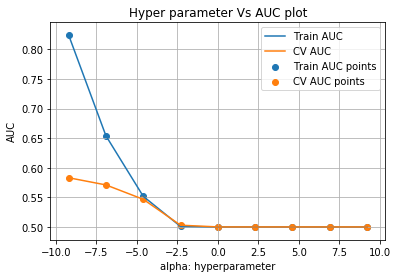

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.152552      0.016611         0.003518        0.004189    -9.21034   
1       0.136772      0.013299         0.002607        0.000200    -6.90776   
2       0.101227      0.010900         0.002804        0.000510    -4.60517   
3       0.091694      0.011087         0.002206        0.000460    -2.30259   
4       0.093950      0.010742         0.002105        0.000200           0   

  param_penalty                              params  split0_test_score  \
0            l1  {'alpha': 0.0001, 'penalty': 'l1'}           0.559348   
1            l1   {'alpha': 0.001, 'penalty': 'l1'}           0.587904   
2            l1    {'alpha': 0.01, 'penalty': 'l1'}           0.569978   
3            l1     {'alpha': 0.1, 'penalty': 'l1'}           0.500755   
4            l1       {'alpha': 1, 'penalty': 'l1'}           0.500000   

   split1_test_score  split2_test_score       ...         split2_train_score  \
0           0.560765           0.565116       ...                   0.826617   
1           0.563987           0.558127       ...                   0.661556   
2           0.569392           0.513207       ...                   0.551738   
3           0.500000           0.501177       ...                   0.500347   
4           0.500000           0.500000       ...                   0.500000   

   split3_train_score  split4_train_score  split5_train_score  \
0            0.825087            0.826350            0.823585   
1            0.643257            0.652041            0.660114   
2            0.548398            0.548095            0.551594   
3            0.500000            0.500000            0.505100   
4            0.500000            0.500000            0.500000   

   split6_train_score  split7_train_score  split8_train_score  \
0            0.820714            0.822421            0.820886   
1            0.639712            0.661436            0.650964   
2            0.544077            0.549866            0.559980   
3            0.500000            0.498941            0.500000   
4            0.500000            0.500000            0.500000   

   split9_train_score  mean_train_score  std_train_score  
0            0.823810          0.824225         0.002364  
1            0.647623          0.653948         0.008342  
2            0.552922          0.551741         0.004621  
3            0.505381          0.500762         0.002346  
4            0.500000          0.500000         0.000000  

[5 rows x 32 columns]

In [84]:
#https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/3061/assignment-7-apply-svm/4/module-4-machine-learning-ii-supervised-learning-models
#https://stackoverflow.com/questions/52982340/using-gridsearchcv-gives-an-error-with-calibratedclassifiercv-in-scikit-learn-g

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.datasets import *

tuned_parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4], 'penalty':['l1']}
sgd = SGDClassifier(loss='hinge', class_weight='balanced')
clf = GridSearchCV(sgd, tuned_parameters, cv=10, refit=True, scoring='roc_auc')
clf.fit(x_train_bow, y_train)

calibrated_clf = CalibratedClassifierCV(clf, cv='prefit')
calibrated_clf.fit(x_train_bow, y_train)

results = pd.DataFrame.from_dict(calibrated_clf.base_estimator.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']

for i in range(len(alpha)):
    alpha[i] = np.log(alpha[i])
plt.plot(alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [85]:
calibrated_clf.base_estimator.best_params_

{'alpha': 0.0001, 'penalty': 'l1'}

In [87]:
#Best alpha
best_alpha = 0.0001

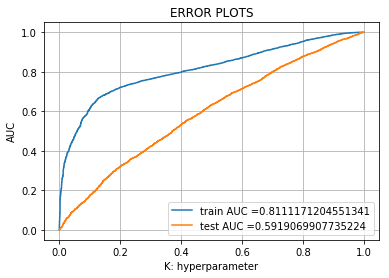

In [89]:
#Hyper Parameter Tuning with Best-alpha

from sklearn.metrics import roc_curve, auc

sgd = SGDClassifier(loss='hinge', penalty='l1', alpha=best_alpha, class_weight='balanced')
sgd.fit(x_train_bow, y_train)
calibrated_clf = CalibratedClassifierCV(sgd, cv='prefit')
calibrated_clf.fit(x_train_bow, y_train)

y_train_pred = calibrated_clf.predict_proba(x_train_bow) [:, 1]
y_test_pred = calibrated_clf.predict_proba(x_test_bow) [:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")

plt.show()

In [90]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [91]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.5828431531088939 for threshold 0.855
Train confusion matrix
[[ 2970   493]
 [ 6082 12900]]
Test confusion matrix
[[1273 1273]
 [5133 8821]]


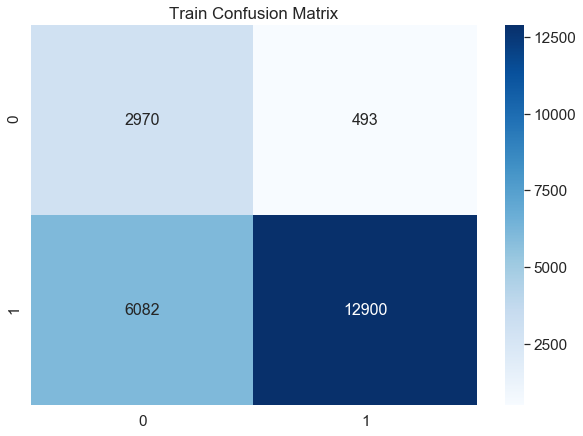

In [92]:
import seaborn as sns

#Train Confusion matrix

#Reference- https://www.kaggle.com/agungor2/various-confusion-matrix-plots

df_cm = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), columns=np.unique(y_train), index = np.unique(y_train))

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
plt.title('Train Confusion Matrix')
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt='g', annot_kws={"size": 16})

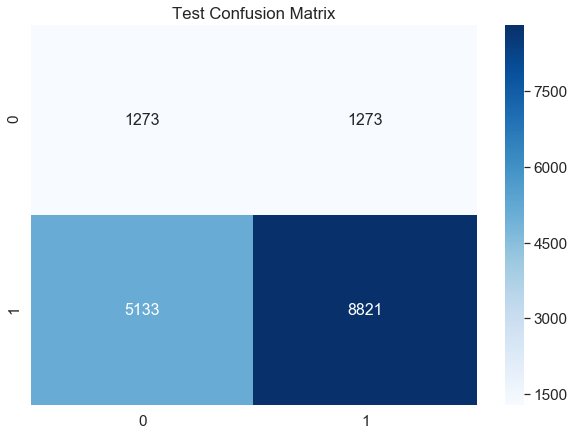

In [93]:
#Test Confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), columns=np.unique(y_test), index = np.unique(y_test))

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
plt.title('Test Confusion Matrix')
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt='g', annot_kws={"size": 16})

## Set-2

In [94]:
#Merging Features

x_train_tfidf = hstack((x_train_price_norm, x_train_previous_projects_norm, x_train_state_one_hot, x_train_teacher_one_hot, \
                     x_train_grade_one_hot, x_train_categories_one_hot, x_train_subcategories_one_hot, x_train_essay_tfidf, \
                     x_train_title_tfidf)).tocsr()

x_test_tfidf = hstack((x_test_price_norm, x_test_previous_projects_norm, x_test_state_one_hot, x_test_teacher_one_hot, \
                     x_test_grade_one_hot, x_test_categories_one_hot, x_test_subcategories_one_hot, x_test_essay_tfidf, \
                     x_test_title_tfidf)).tocsr()
                    
x_cv_tfidf = hstack((x_cv_price_norm, x_cv_previous_projects_norm, x_cv_state_one_hot, x_cv_teacher_one_hot, \
                     x_cv_grade_one_hot, x_cv_categories_one_hot, x_cv_subcategories_one_hot, x_cv_essay_tfidf, \
                     x_cv_title_tfidf)).tocsr()

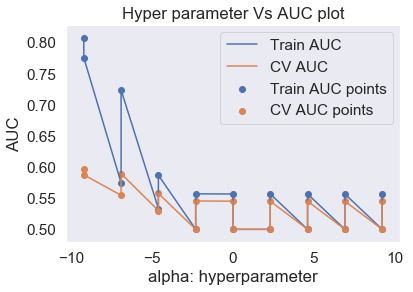

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.119654      0.003434         0.005682        0.000236    -9.21034   
1       0.084225      0.023857         0.007854        0.002328    -9.21034   
2       0.075212      0.001802         0.005001        0.000017    -6.90776   
3       0.049633      0.000819         0.005692        0.000639    -6.90776   
4       0.075407      0.004396         0.005490        0.000017    -4.60517   

  param_penalty                              params  split0_test_score  \
0            l1  {'alpha': 0.0001, 'penalty': 'l1'}           0.589455   
1            l2  {'alpha': 0.0001, 'penalty': 'l2'}           0.590493   
2            l1   {'alpha': 0.001, 'penalty': 'l1'}           0.561430   
3            l2   {'alpha': 0.001, 'penalty': 'l2'}           0.594137   
4            l1    {'alpha': 0.01, 'penalty': 'l1'}           0.534970   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.602348           0.598123         0.596641        0.005367   
1           0.577005           0.595326         0.587608        0.007753   
2           0.552613           0.549868         0.554638        0.004933   
3           0.588591           0.585594         0.589441        0.003539   
4           0.535667           0.519749         0.530129        0.007345   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.816313            0.804065   
1                3            0.798223            0.747949   
2                5            0.577438            0.577734   
3                2            0.752921            0.714083   
4               12            0.535353            0.535417   

   split2_train_score  mean_train_score  std_train_score  
0            0.803059          0.807812         0.006025  
1            0.780696          0.775623         0.020835  
2            0.569028          0.574733         0.004036  
3            0.704134          0.723713         0.021049  
4            0.529491          0.533421         0.002779

In [96]:
#Hyperparameter Tuning

#https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/3061/assignment-7-apply-svm/4/module-4-machine-learning-ii-supervised-learning-models
#https://stackoverflow.com/questions/52982340/using-gridsearchcv-gives-an-error-with-calibratedclassifiercv-in-scikit-learn-g

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.datasets import *

tuned_parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4], 'penalty':['l1', 'l2']}
sgd = SGDClassifier(loss='hinge', class_weight='balanced')
clf = GridSearchCV(sgd, tuned_parameters, cv=3, refit=True, scoring='roc_auc')
clf.fit(x_train_tfidf, y_train)

calibrated_clf = CalibratedClassifierCV(clf, cv='prefit')
calibrated_clf.fit(x_train_tfidf, y_train)

results = pd.DataFrame.from_dict(calibrated_clf.base_estimator.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']

for i in range(len(alpha)):
    alpha[i] = np.log(alpha[i])
plt.plot(alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [97]:
#Best-Alpha
calibrated_clf.base_estimator.best_params_

{'alpha': 0.0001, 'penalty': 'l1'}

In [98]:
best_alpha = 0.0001

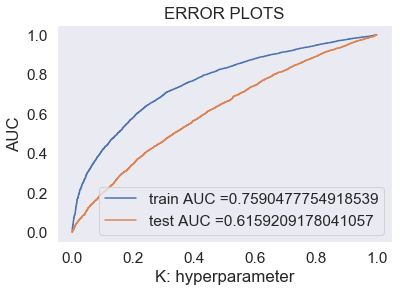

In [99]:
#Hyper Parameter Tuning with Best-alpha

from sklearn.metrics import roc_curve, auc

sgd = SGDClassifier(loss='hinge', penalty='l1', alpha=best_alpha, class_weight='balanced')
sgd.fit(x_train_tfidf, y_train)
calibrated_clf = CalibratedClassifierCV(sgd, cv='prefit')
calibrated_clf.fit(x_train_tfidf, y_train)

y_train_pred = calibrated_clf.predict_proba(x_train_tfidf) [:, 1]
y_test_pred = calibrated_clf.predict_proba(x_test_tfidf) [:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")

plt.show()



In [100]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [101]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.4895761088981574 for threshold 0.839
Train confusion matrix
[[ 2397  1066]
 [ 5556 13426]]
Test confusion matrix
[[1213 1333]
 [4530 9424]]


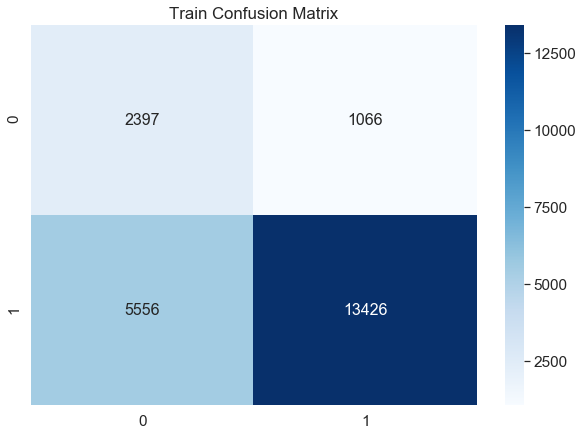

In [102]:
import seaborn as sns

#Train Confusion matrix

#Reference- https://www.kaggle.com/agungor2/various-confusion-matrix-plots

df_cm = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), columns=np.unique(y_train), index = np.unique(y_train))

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
plt.title('Train Confusion Matrix')
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt='g', annot_kws={"size": 16})

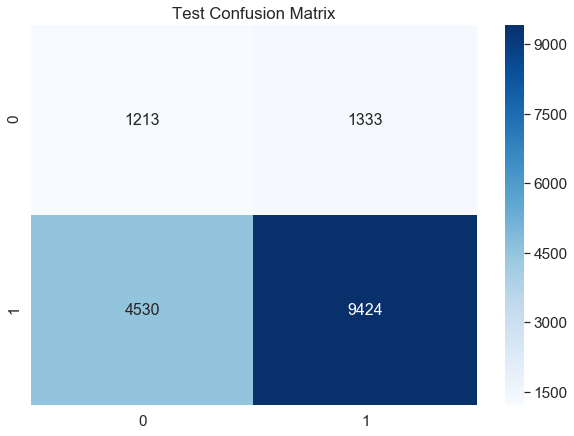

In [103]:
#Test Confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), columns=np.unique(y_test), index = np.unique(y_test))

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
plt.title('Test Confusion Matrix')
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt='g', annot_kws={"size": 16})

## Set-3

In [104]:
#Merging Features

x_train_avg_w2v = hstack((x_train_price_norm, x_train_previous_projects_norm, x_train_state_one_hot, x_train_teacher_one_hot, \
                     x_train_grade_one_hot, x_train_categories_one_hot, x_train_subcategories_one_hot, x_train_essay_avg_w2v, \
                     x_train_title_avg_w2v)).tocsr()

x_test_avg_w2v = hstack((x_test_price_norm, x_test_previous_projects_norm, x_test_state_one_hot, x_test_teacher_one_hot, \
                     x_test_grade_one_hot, x_test_categories_one_hot, x_test_subcategories_one_hot, x_test_essay_avg_w2v, \
                     x_test_title_avg_w2v)).tocsr()
                    
x_cv_avg_w2v = hstack((x_cv_price_norm, x_cv_previous_projects_norm, x_cv_state_one_hot, x_cv_teacher_one_hot, \
                     x_cv_grade_one_hot, x_cv_categories_one_hot, x_cv_subcategories_one_hot, x_cv_essay_avg_w2v, \
                     x_cv_title_avg_w2v)).tocsr()

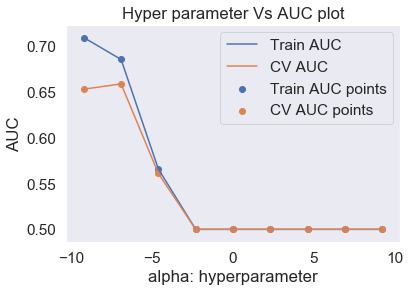

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       1.000378      0.047500         0.009000        0.006310    -9.21034   
1       1.249034      0.045182         0.008193        0.004302    -6.90776   
2       1.274753      0.011197         0.007484        0.004762    -4.60517   
3       1.285261      0.006086         0.007737        0.004407    -2.30259   
4       1.321795      0.075063         0.010139        0.009210           0   

  param_penalty                              params  split0_test_score  \
0            l1  {'alpha': 0.0001, 'penalty': 'l1'}           0.663037   
1            l1   {'alpha': 0.001, 'penalty': 'l1'}           0.656552   
2            l1    {'alpha': 0.01, 'penalty': 'l1'}           0.561926   
3            l1     {'alpha': 0.1, 'penalty': 'l1'}           0.500000   
4            l1       {'alpha': 1, 'penalty': 'l1'}           0.500000   

   split1_test_score  split2_test_score       ...         split2_train_score  \
0           0.635162           0.624575       ...                   0.709226   
1           0.636807           0.639930       ...                   0.685322   
2           0.574737           0.533140       ...                   0.563650   
3           0.500000           0.500000       ...                   0.500000   
4           0.500000           0.500000       ...                   0.500000   

   split3_train_score  split4_train_score  split5_train_score  \
0            0.707190            0.711236            0.710052   
1            0.681904            0.685451            0.689334   
2            0.566709            0.561097            0.561084   
3            0.500000            0.500000            0.500000   
4            0.500000            0.500000            0.500000   

   split6_train_score  split7_train_score  split8_train_score  \
0            0.706452            0.712731            0.712760   
1            0.683427            0.684648            0.689233   
2            0.571994            0.570137            0.570832   
3            0.500000            0.500000            0.500000   
4            0.500000            0.500000            0.500000   

   split9_train_score  mean_train_score  std_train_score  
0            0.705728          0.709706         0.002526  
1            0.683718          0.685761         0.002419  
2            0.565742          0.565905         0.004039  
3            0.500000          0.500000         0.000000  
4            0.500000          0.500000         0.000000  

[5 rows x 32 columns]

In [105]:
#Hyperparameter Tuning

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.datasets import *

tuned_parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4], 'penalty':['l1']}
sgd = SGDClassifier(loss='hinge', class_weight='balanced')
clf = GridSearchCV(sgd, tuned_parameters, cv=10, refit=True, scoring='roc_auc')
clf.fit(x_train_avg_w2v, y_train)

calibrated_clf = CalibratedClassifierCV(clf, cv='prefit')
calibrated_clf.fit(x_train_avg_w2v, y_train)

results = pd.DataFrame.from_dict(calibrated_clf.base_estimator.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']

for i in range(len(alpha)):
    alpha[i] = np.log(alpha[i])
plt.plot(alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [106]:
calibrated_clf.base_estimator.best_params_

{'alpha': 0.001, 'penalty': 'l1'}

In [108]:
#Best-alpha
best_alpha = 0.001

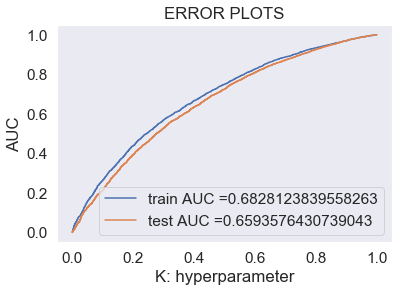

In [109]:
#Hyperparameter Tuning with Best-alpha

from sklearn.metrics import roc_curve, auc

sgd = SGDClassifier(loss='hinge', penalty='l1', alpha=best_alpha, class_weight='balanced')
sgd.fit(x_train_avg_w2v, y_train)
calibrated_clf = CalibratedClassifierCV(sgd, cv='prefit')
calibrated_clf.fit(x_train_avg_w2v, y_train)

y_train_pred = calibrated_clf.predict_proba(x_train_avg_w2v) [:, 1]
y_test_pred = calibrated_clf.predict_proba(x_test_avg_w2v) [:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")

plt.show()

In [110]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [111]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.40259104686102765 for threshold 0.841
Train confusion matrix
[[ 2166  1297]
 [ 6764 12218]]
Test confusion matrix
[[1521 1025]
 [5079 8875]]


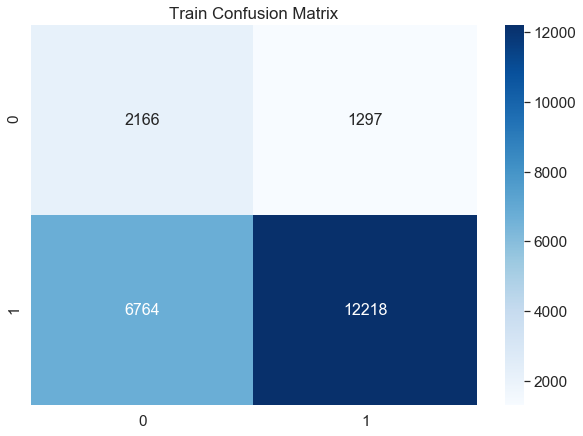

In [112]:
import seaborn as sns

#Train Confusion matrix

#Reference- https://www.kaggle.com/agungor2/various-confusion-matrix-plots

df_cm = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), columns=np.unique(y_train), index = np.unique(y_train))

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
plt.title('Train Confusion Matrix')
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt='g', annot_kws={"size": 16})

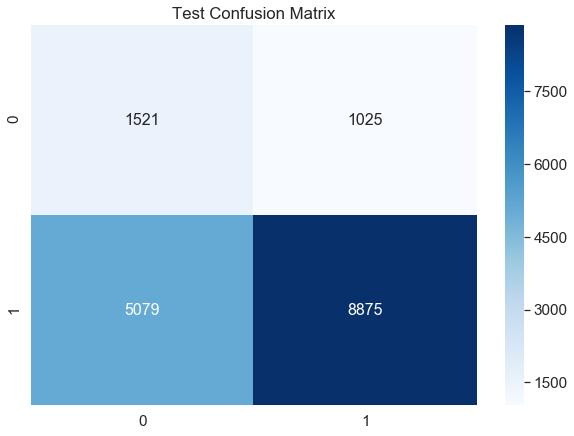

In [113]:
#Test Confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), columns=np.unique(y_test), index = np.unique(y_test))

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
plt.title('Test Confusion Matrix')
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt='g', annot_kws={"size": 16})

## Set-4

In [114]:
#Merging Features

x_train_tfidf_w2v = hstack((x_train_price_norm, x_train_previous_projects_norm, x_train_state_one_hot, x_train_teacher_one_hot, \
                     x_train_grade_one_hot, x_train_categories_one_hot, x_train_subcategories_one_hot, x_train_essay_tfidf_w2v, \
                     x_train_title_tfidf_w2v)).tocsr()

x_test_tfidf_w2v = hstack((x_test_price_norm, x_test_previous_projects_norm, x_test_state_one_hot, x_test_teacher_one_hot, \
                     x_test_grade_one_hot, x_test_categories_one_hot, x_test_subcategories_one_hot, x_test_essay_tfidf_w2v, \
                     x_test_title_tfidf_w2v)).tocsr()
                    
x_cv_tfidf_w2v = hstack((x_cv_price_norm, x_cv_previous_projects_norm, x_cv_state_one_hot, x_cv_teacher_one_hot, \
                     x_cv_grade_one_hot, x_cv_categories_one_hot, x_cv_subcategories_one_hot, x_cv_essay_tfidf_w2v, \
                     x_cv_title_tfidf_w2v)).tocsr()

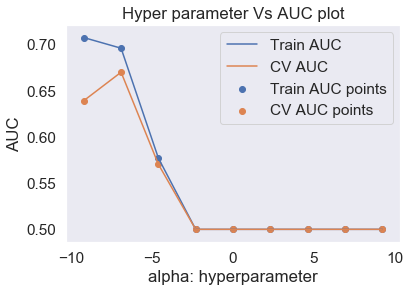

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       1.048197      0.108390         0.008529        0.005532    -9.21034   
1       1.299528      0.067493         0.007025        0.004206    -6.90776   
2       1.297707      0.023057         0.008835        0.003402    -4.60517   
3       1.309446      0.010214         0.005727        0.004556    -2.30259   
4       1.329276      0.030665         0.004461        0.002995           0   

  param_penalty                              params  split0_test_score  \
0            l1  {'alpha': 0.0001, 'penalty': 'l1'}           0.641299   
1            l1   {'alpha': 0.001, 'penalty': 'l1'}           0.682760   
2            l1    {'alpha': 0.01, 'penalty': 'l1'}           0.598460   
3            l1     {'alpha': 0.1, 'penalty': 'l1'}           0.500000   
4            l1       {'alpha': 1, 'penalty': 'l1'}           0.500000   

   split1_test_score  split2_test_score       ...         split2_train_score  \
0           0.638231           0.592072       ...                   0.705230   
1           0.652446           0.646529       ...                   0.694522   
2           0.580266           0.554901       ...                   0.581757   
3           0.500000           0.500000       ...                   0.500000   
4           0.500000           0.500000       ...                   0.500000   

   split3_train_score  split4_train_score  split5_train_score  \
0            0.715505            0.707310            0.704492   
1            0.702989            0.685710            0.697220   
2            0.575696            0.580892            0.575510   
3            0.500000            0.500000            0.500000   
4            0.500000            0.500000            0.500000   

   split6_train_score  split7_train_score  split8_train_score  \
0            0.710095            0.710626            0.710112   
1            0.694193            0.699455            0.694737   
2            0.577835            0.570478            0.576030   
3            0.500000            0.500000            0.500000   
4            0.500000            0.500000            0.500000   

   split9_train_score  mean_train_score  std_train_score  
0            0.704923          0.707362         0.004135  
1            0.693420          0.695857         0.004372  
2            0.577095          0.577045         0.003039  
3            0.500000          0.500000         0.000000  
4            0.500000          0.500000         0.000000  

[5 rows x 32 columns]

In [115]:
#Hyperparameter Tuning

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.datasets import *

tuned_parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4], 'penalty':['l1']}
sgd = SGDClassifier(loss='hinge', class_weight='balanced')
clf = GridSearchCV(sgd, tuned_parameters, cv=10, refit=True, scoring='roc_auc')
clf.fit(x_train_tfidf_w2v, y_train)

calibrated_clf = CalibratedClassifierCV(clf, cv='prefit')
calibrated_clf.fit(x_train_tfidf_w2v, y_train)

results = pd.DataFrame.from_dict(calibrated_clf.base_estimator.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']

for i in range(len(alpha)):
    alpha[i] = np.log(alpha[i])
plt.plot(alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [116]:
calibrated_clf.base_estimator.best_params_

{'alpha': 0.001, 'penalty': 'l1'}

In [117]:
#Best-alpha
best_alpha = 0.001

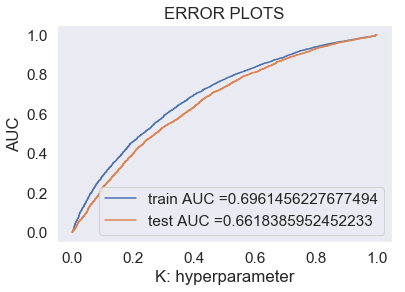

In [118]:
#Hyperparameter Tuning with Best-alpha

from sklearn.metrics import roc_curve, auc

sgd = SGDClassifier(loss='hinge', penalty='l1', alpha=best_alpha, class_weight='balanced')
sgd.fit(x_train_tfidf_w2v, y_train)
calibrated_clf = CalibratedClassifierCV(sgd, cv='prefit')
calibrated_clf.fit(x_train_tfidf_w2v, y_train)

y_train_pred = calibrated_clf.predict_proba(x_train_tfidf_w2v) [:, 1]
y_test_pred = calibrated_clf.predict_proba(x_test_tfidf_w2v) [:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")

plt.show()


In [119]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [120]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.41945744426540477 for threshold 0.84
Train confusion matrix
[[ 2261  1202]
 [ 6787 12195]]
Test confusion matrix
[[1518 1028]
 [5033 8921]]


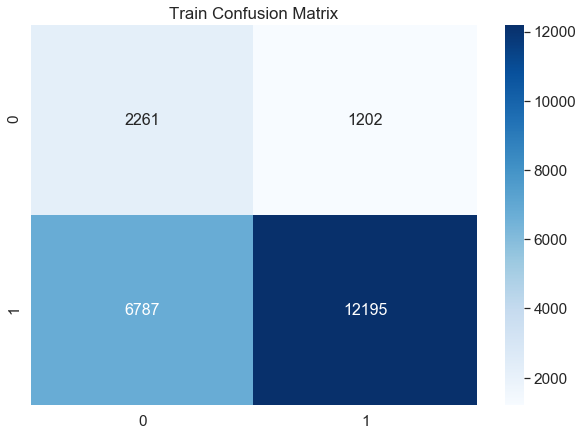

In [121]:
import seaborn as sns

#Train Confusion matrix

#Reference- https://www.kaggle.com/agungor2/various-confusion-matrix-plots

df_cm = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), columns=np.unique(y_train), index = np.unique(y_train))

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
plt.title('Train Confusion Matrix')
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt='g', annot_kws={"size": 16})

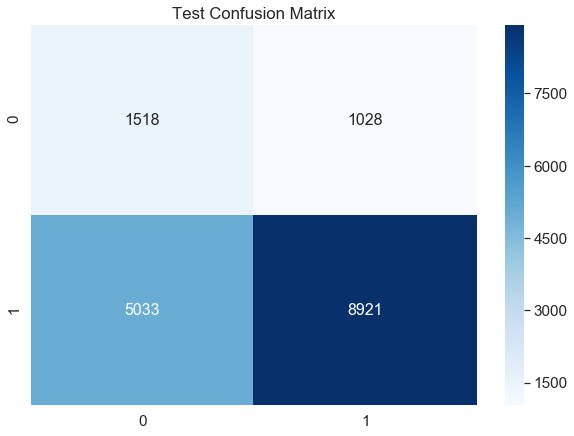

In [122]:
#Test Confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), columns=np.unique(y_test), index = np.unique(y_test))

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
plt.title('Test Confusion Matrix')
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt='g', annot_kws={"size": 16})

<h2>2.5 Support Vector Machines with added Features `Set 5` </h2>

In [123]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [124]:
#Sentiment Score

In [125]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sentiment_neg=[]
sentiment_neu=[]
sentiment_pos=[]
sentiment_comp=[]

sid = SIA()
for sentence in tqdm(project_data['essay'].values):
    ss = sid.polarity_scores(sentence) 
    sentiment_neg.append(ss['neg'])
    sentiment_neu.append(ss['neu'])
    sentiment_pos.append(ss['pos'])
    sentiment_comp.append(ss['compound'])

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:30<00:00, 331.58it/s]


In [126]:
#Number of words in Essay and Title

In [127]:
#Train Data

#number of words in the title
words_in_title_train = []
for i in x_train['project_title']:
    a = len(i.split())
    words_in_title_train.append(a)

#number of words in the essay
words_in_essay_train = []
for i in x_train['essay']:
    a = len(i.split())
    words_in_essay_train.append(a)
    

print(np.shape(words_in_title_train))
print(np.shape(words_in_essay_train))

(22445,)
(22445,)


In [128]:
#Test Data

#number of words in the title
words_in_title_test = []
for i in x_test['project_title']:
    a = len(i.split())
    words_in_title_test.append(a)

#number of words in the essay
words_in_essay_test = []
for i in x_test['essay']:
    a = len(i.split())
    words_in_essay_test.append(a)
    

print(np.shape(words_in_title_test))
print(np.shape(words_in_essay_test))

(16500,)
(16500,)


In [129]:
#CV data

#number of words in the title
words_in_title_cv = []
for i in x_cv['project_title']:
    a = len(i.split())
    words_in_title_cv.append(a)

#number of words in the essay
words_in_essay_cv = []
for i in x_cv['essay']:
    a = len(i.split())
    words_in_essay_cv.append(a)
    

print(np.shape(words_in_title_cv))
print(np.shape(words_in_essay_cv))

(11055,)
(11055,)


In [130]:
#Reshaping 

#Train
words_in_essay_train = np.array(words_in_essay_train)
words_in_title_train = np.array(words_in_title_train)

words_in_essay_train = words_in_essay_train.reshape(-1, 1)
words_in_title_train = words_in_title_train.reshape(-1, 1)

print(words_in_essay_train.shape)
print(words_in_title_train.shape)
print('*'*20)


#Test
words_in_title_test = np.array(words_in_title_test)
words_in_essay_test = np.array(words_in_essay_test)

words_in_title_test = words_in_title_test.reshape(-1, 1)
words_in_essay_test = words_in_essay_test.reshape(-1, 1)

print(words_in_title_test.shape)
print(words_in_essay_test.shape)
print('*'*20)


#CV
words_in_title_cv = np.array(words_in_title_cv)
words_in_essay_cv = np.array(words_in_essay_cv)

words_in_title_cv = words_in_title_cv.reshape(-1, 1)
words_in_essay_cv = words_in_essay_cv.reshape(-1, 1)

print(words_in_title_cv.shape)
print(words_in_essay_cv.shape)

(22445, 1)
(22445, 1)
********************
(16500, 1)
(16500, 1)
********************
(11055, 1)
(11055, 1)


In [131]:
#Reshaping the lists we got in sentiment analysis and slicing lists into train, test, cv

#For Train
#Sentiment_neg
sentiment_neg_train = np.array(sentiment_neg)
sentiment_neg_train = sentiment_neg_train.reshape(-1, 1) [:22445]
print(sentiment_neg_train.shape)

#Sentiment_pos
sentiment_pos_train = np.array(sentiment_pos)
sentiment_pos_train = sentiment_pos_train.reshape(-1, 1) [:22445]
print(sentiment_pos_train.shape)

#Sentiment_neu
sentiment_neu_train = np.array(sentiment_neu)
sentiment_neu_train = sentiment_neu_train.reshape(-1, 1) [:22445]
print(sentiment_neu_train.shape)

#Sentiment_comp
sentiment_comp_train = np.array(sentiment_comp)
sentiment_comp_train = sentiment_comp_train.reshape(-1, 1) [:22445]
print(sentiment_comp_train.shape)
print('*'*50)

#For Test
#Sentiment_neg
sentiment_neg_test = np.array(sentiment_neg)
sentiment_neg_test = sentiment_neg_test.reshape(-1, 1) [22445:38945]
print(sentiment_neg_test.shape)

#Sentiment_pos
sentiment_pos_test = np.array(sentiment_pos)
sentiment_pos_test = sentiment_pos_test.reshape(-1, 1) [22445:38945]
print(sentiment_pos_test.shape)

#Sentiment_neu
sentiment_neu_test = np.array(sentiment_neu)
sentiment_neu_test = sentiment_neu_test.reshape(-1, 1) [22445:38945]
print(sentiment_neu_test.shape)

#Sentiment_comp
sentiment_comp_test = np.array(sentiment_comp)
sentiment_comp_test = sentiment_comp_test.reshape(-1, 1) [22445:38945]
print(sentiment_comp_test.shape)
print('*'*50)

#For CV
#Sentiment_neg
sentiment_neg_cv = np.array(sentiment_neg)
sentiment_neg_cv = sentiment_neg_cv.reshape(-1, 1) [38945:50000]
print(sentiment_neg_cv.shape)

#Sentiment_pos
sentiment_pos_cv = np.array(sentiment_pos)
sentiment_pos_cv = sentiment_pos_cv.reshape(-1, 1) [38945:50000]
print(sentiment_pos_cv.shape)

#Sentiment_neu
sentiment_neu_cv = np.array(sentiment_neu)
sentiment_neu_cv = sentiment_neu_cv.reshape(-1, 1) [38945:50000]
print(sentiment_neu_cv.shape)

#Sentiment_comp
sentiment_comp_cv = np.array(sentiment_comp)
sentiment_comp_cv = sentiment_comp_cv.reshape(-1, 1) [38945:50000]
print(sentiment_comp_cv.shape)



(22445, 1)
(22445, 1)
(22445, 1)
(22445, 1)
**************************************************
(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)
**************************************************
(11055, 1)
(11055, 1)
(11055, 1)
(11055, 1)


In [132]:
#Apply TruncatedSVD on TfidfVectorizer of essay text, choose the number of components (`n_components`) using elbow method : numerical data

In [133]:
#Checking the shapes of  TfidfVectorizer Essay Train, test, cv
print(x_train_essay_tfidf.shape)
print(x_test_essay_tfidf.shape)
print(x_cv_essay_tfidf.shape)

(22445, 5000)
(16500, 5000)
(11055, 5000)


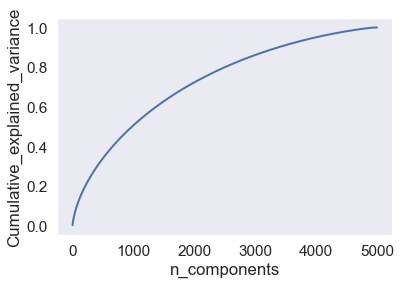

In [134]:
#Elbow Method to choose n_components for TruncatedSVD
from sklearn import decomposition
pca = decomposition.PCA()


#For Train
x_train_essay_tfidf = x_train_essay_tfidf.toarray()

pca.n_components = 5000
pca_data = pca.fit_transform(x_train_essay_tfidf)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()



In [135]:
#I want to preserve 70% of data. So I'm choosing n_components=1800

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=1800, n_iter=100)

train_essay_svd = svd.fit_transform(x_train_essay_tfidf)
print(train_essay_svd.shape)

(22445, 1800)


In [136]:
test_essay_svd = svd.transform(x_test_essay_tfidf)
cv_essay_svd = svd.transform(x_cv_essay_tfidf)
print(test_essay_svd.shape)
print(cv_essay_svd.shape)

(16500, 1800)
(11055, 1800)


In [137]:
from scipy.sparse import hstack
x_train_set_5 = hstack((x_train_price_norm, x_train_previous_projects_norm, x_train_state_one_hot, x_train_teacher_one_hot, \
                        x_train_grade_one_hot, x_train_categories_one_hot, x_train_subcategories_one_hot, x_train_quantity_norm, \
                        words_in_essay_train, words_in_title_train, \
                      sentiment_neg_train, sentiment_pos_train, sentiment_neu_train, sentiment_comp_train, train_essay_svd)).tocsr()

x_test_set_5 = hstack((x_test_price_norm, x_test_previous_projects_norm, x_test_state_one_hot, x_test_teacher_one_hot, \
                     x_test_grade_one_hot, x_test_categories_one_hot, x_test_subcategories_one_hot, x_test_quantity_norm,\
                       words_in_essay_test, words_in_title_test,\
                      sentiment_neg_test, sentiment_pos_test, sentiment_neu_test, sentiment_comp_test, test_essay_svd)).tocsr()
                    
x_cv_set_5 = hstack((x_cv_price_norm, x_cv_previous_projects_norm, x_cv_state_one_hot, x_cv_teacher_one_hot, \
                     x_cv_grade_one_hot, x_cv_categories_one_hot, x_cv_subcategories_one_hot, x_cv_quantity_norm,\
                     words_in_essay_cv, words_in_title_cv,\
                    sentiment_neg_cv, sentiment_pos_cv, sentiment_neu_cv, sentiment_comp_cv, cv_essay_svd)).tocsr()

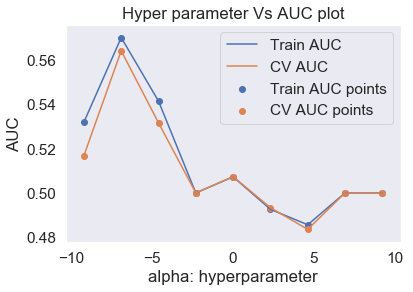

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       3.874661      0.459224         0.082872        0.141049    -9.21034   
1       2.736110      0.035132         0.020776        0.008024    -6.90776   
2       2.777774      0.115531         0.043571        0.034854    -4.60517   
3       3.675699      0.229914         0.021675        0.014871    -2.30259   
4       3.899208      0.189958         0.023768        0.020504           0   

  param_penalty                              params  split0_test_score  \
0            l1  {'alpha': 0.0001, 'penalty': 'l1'}           0.583579   
1            l1   {'alpha': 0.001, 'penalty': 'l1'}           0.580295   
2            l1    {'alpha': 0.01, 'penalty': 'l1'}           0.519057   
3            l1     {'alpha': 0.1, 'penalty': 'l1'}           0.500000   
4            l1       {'alpha': 1, 'penalty': 'l1'}           0.500000   

   split1_test_score  split2_test_score       ...         split2_train_score  \
0           0.563137           0.509546       ...                   0.555765   
1           0.580982           0.542086       ...                   0.555546   
2           0.542369           0.497664       ...                   0.495607   
3           0.500000           0.500000       ...                   0.500000   
4           0.500000           0.500000       ...                   0.500000   

   split3_train_score  split4_train_score  split5_train_score  \
0            0.461391            0.589727            0.443720   
1            0.547636            0.583850            0.573501   
2            0.526301            0.558801            0.572608   
3            0.500000            0.500000            0.500000   
4            0.500000            0.572757            0.500000   

   split6_train_score  split7_train_score  split8_train_score  \
0            0.592519            0.445779            0.472623   
1            0.582742            0.575627            0.570712   
2            0.524129            0.514075            0.560244   
3            0.500000            0.500000            0.500000   
4            0.500000            0.500000            0.500000   

   split9_train_score  mean_train_score  std_train_score  
0            0.591083          0.531904         0.063323  
1            0.545671          0.570024         0.014183  
2            0.570178          0.541388         0.025938  
3            0.500000          0.500000         0.000000  
4            0.500000          0.507276         0.021827  

[5 rows x 32 columns]

In [138]:
#Hyperparameter Tuning

tuned_parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4], 'penalty':['l1']}
sgd = SGDClassifier(loss='hinge', class_weight='balanced')
clf = GridSearchCV(sgd, tuned_parameters, cv=10, refit=True, scoring='roc_auc')
clf.fit(x_train_set_5, y_train)

calibrated_clf = CalibratedClassifierCV(clf, cv='prefit')
calibrated_clf.fit(x_train_set_5, y_train)

results = pd.DataFrame.from_dict(calibrated_clf.base_estimator.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']

for i in range(len(alpha)):
    alpha[i] = np.log(alpha[i])
plt.plot(alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [139]:
calibrated_clf.base_estimator.best_params_

{'alpha': 0.001, 'penalty': 'l1'}

In [140]:
#Best-alpha
best_alpha = 0.001

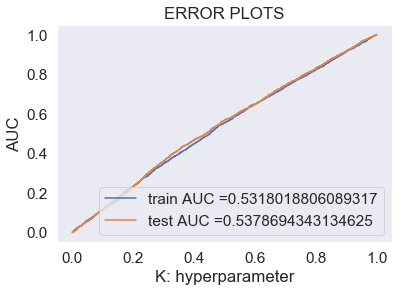

In [141]:
#Hyperparameter Tuning with Best-alpha

from sklearn.metrics import roc_curve, auc

sgd = SGDClassifier(loss='hinge', penalty='l1', alpha=best_alpha, class_weight='balanced')
sgd.fit(x_train_set_5, y_train)
calibrated_clf = CalibratedClassifierCV(sgd, cv='prefit')
calibrated_clf.fit(x_train_set_5, y_train)

y_train_pred = calibrated_clf.predict_proba(x_train_set_5) [:, 1]
y_test_pred = calibrated_clf.predict_proba(x_test_set_5) [:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")

plt.show()

In [142]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [143]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.28015939108901833 for threshold 0.844
Train confusion matrix
[[ 1796  1667]
 [ 8728 10254]]
Test confusion matrix
[[1331 1215]
 [6406 7548]]


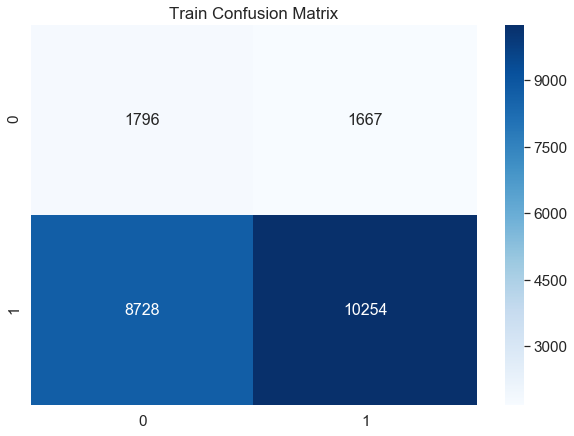

In [144]:
import seaborn as sns

#Train Confusion matrix

#Reference- https://www.kaggle.com/agungor2/various-confusion-matrix-plots

df_cm = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), columns=np.unique(y_train), index = np.unique(y_train))

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
plt.title('Train Confusion Matrix')
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt='g', annot_kws={"size": 16})

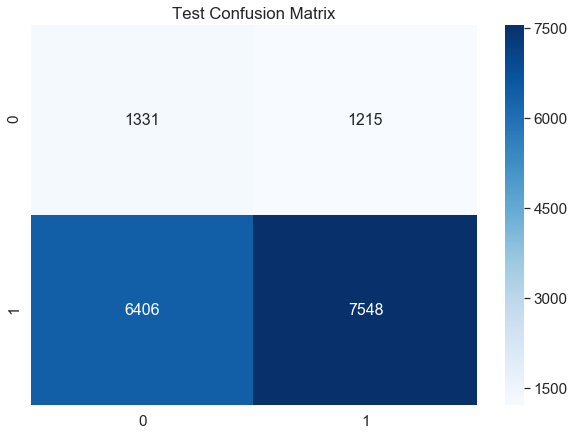

In [145]:
#Test Confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), columns=np.unique(y_test), index = np.unique(y_test))

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
plt.title('Test Confusion Matrix')
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt='g', annot_kws={"size": 16})

<h1>3. Conclusion</h1>

In [143]:
# Please compare all your models using Prettytable library

In [146]:
from prettytable import PrettyTable

x = PrettyTable()

x. field_names = ['Vectorizer', 'Model', 'HyperParameter', 'AUC']

x.add_row(['Set-1', 'Brute', '0.0001', '0.59'])
x.add_row(['Set-2', 'Brute', '0.0001', '0.61'])
x.add_row(['Set-3', 'Brute', '0.001', '0.65'])
x.add_row(['Set-4', 'Brute', '0.001', '0.66'])
x.add_row(['Set-5', 'Brute', '0.001', '0.53'])

print(x)

+------------+-------+----------------+------+
| Vectorizer | Model | HyperParameter | AUC  |
+------------+-------+----------------+------+
|   Set-1    | Brute |     0.0001     | 0.59 |
|   Set-2    | Brute |     0.0001     | 0.61 |
|   Set-3    | Brute |     0.001      | 0.65 |
|   Set-4    | Brute |     0.001      | 0.66 |
|   Set-5    | Brute |     0.001      | 0.53 |
+------------+-------+----------------+------+
